# Python Statistics 

10/11/2018<br>
Mooyoung Lee

Objective:  List basic statistics libraries

# Data loading

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Groupby Aggregations

In [2]:
# Class Distribution: 212 - Malignant, 357 - Benign
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [3]:
df.groupby('target')['mean radius'].count()

target
0    212
1    357
Name: mean radius, dtype: int64

In [4]:
df.groupby('target')['mean radius'].agg(np.mean)

target
0    17.462830
1    12.146524
Name: mean radius, dtype: float64

In [5]:
df.groupby('target')['mean radius'].agg([np.mean, np.std, np.min, np.max])

,mean,std,amin,amax
target,,,,
0,17.462830,3.203971,10.950,28.11
1,12.146524,1.780512,6.981,17.85


## Transformations

In [6]:
z_score = lambda x: (x-x.mean())/x.std()
df.groupby('target')['mean radius'].transform(z_score).head()

0    0.164536
1    0.969787
2    0.695128
3   -1.886044
4    0.882396
Name: mean radius, dtype: float64

## Filtration

In [7]:
df.groupby('target')['mean radius'].filter(lambda x: np.mean(x) >20)

Series([], Name: mean radius, dtype: float64)

# Student's t-test

In [8]:
malignant = df.loc[df['target']==0,'mean radius']
benigh =  df.loc[df['target']==1,'mean radius']

## 1-sample ttest

In [9]:
from scipy import stats
stats.ttest_1samp(malignant, 17)

Ttest_1sampResult(statistic=2.1032990171738555, pvalue=0.036624576878916584)

##  2-sample ttest

In [10]:
stats.ttest_ind(malignant, benigh)

Ttest_indResult(statistic=25.435821610057054, pvalue=8.465940572262422e-96)

# Paired tests for Repeated measurements

for the repreated measurements on the same individual or equipment the confounding inner variability need to be removed.

In [11]:
# transformation
z_score = lambda x: (x-x.mean())/x.std()
malignant_radius = malignant.transform(z_score)
malignant_texture = df.loc[df['target']==0,'mean texture'].transform(z_score)

stats.ttest_rel(malignant_texture, malignant_radius)

Ttest_relResult(statistic=-2.281623618998524e-15, pvalue=0.9999999999999982)

In [12]:
stats.ttest_1samp(malignant_texture - malignant_radius, 0)

Ttest_1sampResult(statistic=-2.281623618998524e-15, pvalue=0.9999999999999982)

# Linear Model

In [13]:
from statsmodels.formula.api import ols

# column name conversion; failed to pythonian coding
fixed_name = []
for name in data.feature_names:
    fixed_name.append(name.replace(' ','_'))
fixed_name.append('target')
df.columns = fixed_name

model = ols('target ~ mean_radius', df).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     647.0
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           8.47e-96
Time:                        12:44:46   Log-Likelihood:                -177.28
No. Observations:                 569   AIC:                             358.6
Df Residuals:                     567   BIC:                             367.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0436      0.057     35.615      0.000       1.931       2.156
mean_radius    -0.1002      0.004    -25.436      0.000      -0.108      -0.093
==============================================================================
Omnibus:                       35.054   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.544
Skew:                          -0.651   Prob(JB):                     1.57e-09
Kurtosis:                       2.876   Cond. No.                         60.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple regression

In [15]:
model = ols('target ~ mean_radius + mean_texture + mean_symmetry', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     303.7
Date:                Thu, 11 Oct 2018   Prob (F-statistic):          2.23e-117
Time:                        12:44:46   Log-Likelihood:                -120.65
No. Observations:                 569   AIC:                             249.3
Df Residuals:                     565   BIC:                             266.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9917      0.101     29.595      0.000       2.793       3.190
mean_radius      -0.0871      0.004    -22.856      0.000      -0.095      -0.080
mean_texture     -0.0218      0.003     -7.046      0.000      -0.028      -0.016
mean_symmetry    -3.9354      0.465     -8.469      0.000      -4.848      -3.023
==============================================================================
Omnibus:                       25.787   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.440
Skew:                          -0.540   Prob(JB):                     6.67e-07
Kurtosis:                       2.822   Cond. No.                         912.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model w/ interaction

In [16]:
model = ols('target ~ mean_radius + mean_texture + mean_radius*mean_texture', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     248.3
Date:                Thu, 11 Oct 2018   Prob (F-statistic):          9.83e-103
Time:                        12:44:46   Log-Likelihood:                -154.65
No. Observations:                 569   AIC:                             317.3
Df Residuals:                     565   BIC:                             334.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.3435      0.276      8.500      0.000       1.802       2.885
mean_radius                 -0.0908      0.020     -4.614      0.000      -0.129      -0.052
mean_texture                -0.0221      0.014     -1.626      0.105      -0.049       0.005
mean_radius:mean_texture -2.894e-05      0.001     -0.031      0.975      -0.002       0.002
==============================================================================
Omnibus:                       31.743   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.147
Skew:                          -0.614   Prob(JB):                     1.42e-08
Kurtosis:                       2.874   Cond. No.                     6.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# ANOVA

In [17]:
stats.f_oneway(df.mean_radius, df.mean_texture, df.mean_symmetry)

F_onewayResult(statistic=5394.694586274463, pvalue=0.0)

# seaborn pairplot

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


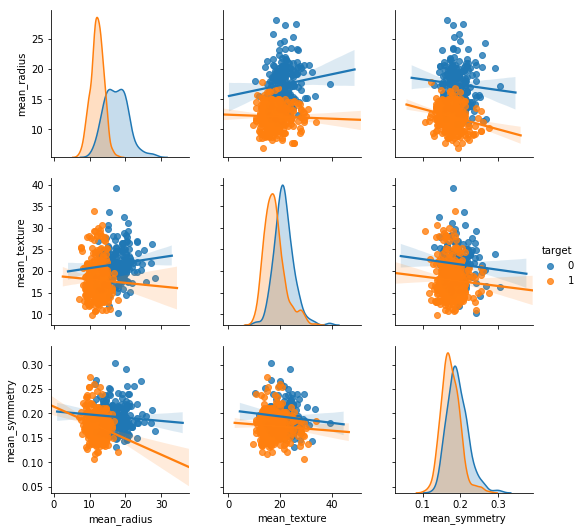

In [18]:
import seaborn as sb
sb.pairplot(df, vars =  ['mean_radius', 'mean_texture', 'mean_symmetry'],
            hue = 'target',
            kind = 'reg')

# Regression plot

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


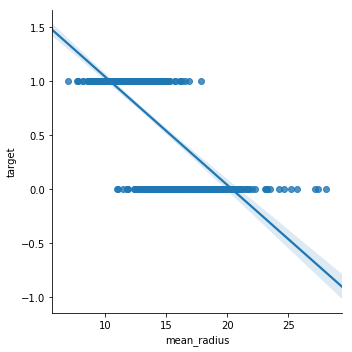

In [19]:
sb.lmplot(y = 'target', x = 'mean_radius', data = df)